In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


In [5]:
print(check_output(["ls", "."]).decode("utf8"))

app.py
iris.csv
tensor.py
Untitled.ipynb



In [7]:
##!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 20 23:48:47 2017

@author: akashsrivastava
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.utils import to_categorical


#os.chdir('/Users/akashsrivastava/Desktop/MachineLearning/kaggle/iris-keras')

dataset = pd.read_csv('./iris.csv')

dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


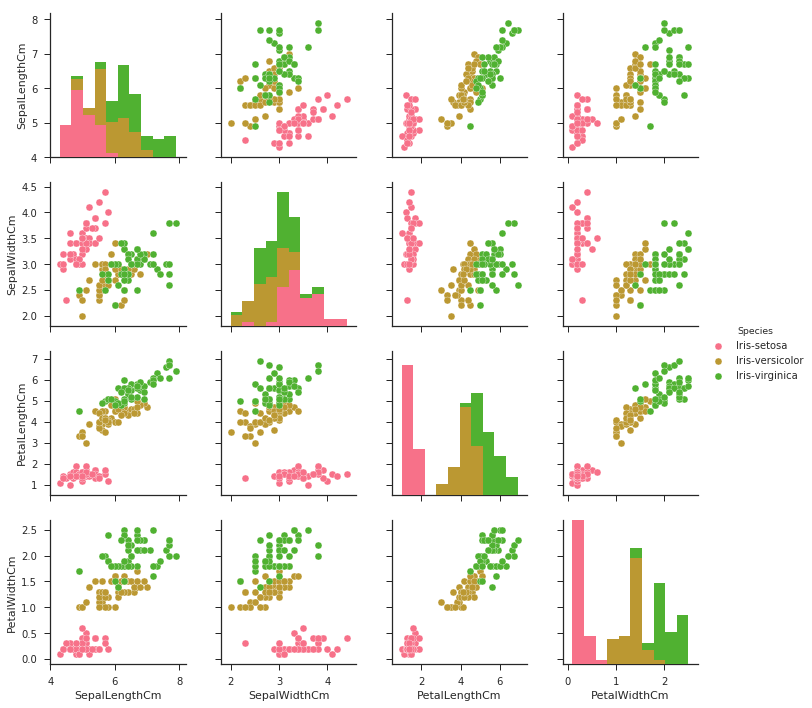

In [8]:
import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(dataset.iloc[:,1:6],hue="Species")

In [9]:
#Splitting the data into training and test test
X = dataset.iloc[:,1:5].values
y = dataset.iloc[:,5].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [13]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

#Sigmoid, tanh, Softmax, ReLU, Leaky ReLU

model.add(Dense(10,input_shape=(4,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))

model.compile(SGD(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [17]:
#fitting the model and predicting 
model.fit(X_train,y_train,epochs=10)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)


Epoch 1/10
120/120 [==============================] - 0s 919us/step - loss: 0.2389 - acc: 0.9333
Epoch 2/10
120/120 [==============================] - 0s 621us/step - loss: 0.6745 - acc: 0.7000
Epoch 3/10
120/120 [==============================] - 0s 436us/step - loss: 0.1859 - acc: 0.9583
Epoch 4/10
120/120 [==============================] - 0s 439us/step - loss: 0.1600 - acc: 0.9750
Epoch 5/10
120/120 [==============================] - 0s 768us/step - loss: 0.2960 - acc: 0.8583
Epoch 6/10
120/120 [==============================] - 0s 2ms/step - loss: 0.3700 - acc: 0.8167
Epoch 7/10
120/120 [==============================] - 0s 248us/step - loss: 0.1758 - acc: 0.9667
Epoch 8/10
120/120 [==============================] - 0s 404us/step - loss: 0.1850 - acc: 0.9583
Epoch 9/10
120/120 [==============================] - 0s 486us/step - loss: 0.2046 - acc: 0.9417
Epoch 10/10
120/120 [==============================] - 0s 511us/step - loss: 0.3208 - acc: 0.8667


In [15]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
